# Clean and dirty setup on qiskit 
This notebook contains an example of how you can use the provided code in `reproduce_figure_5_data.py` to both recreate the depolarizing noise version of the clean and dirty setup and plot the results. A small pre-computed example for 4 qubits to 600 layers is provided in the results folder and can be visualized here.
### Requirements
Pandas (1.3.3), seaborn (0.11.2), numpy (1.23.4), qiskit (0.22.1), mthree (1.1.0)
## Running 
The function `figure_5_data` allows a quick way to generate data similar to the paper. We used a proprietary LANL code which sadly cannot be shared, but the eager reader is more than welcome to use and modify the provided code which is spread between `reproduce_figure_5_data.py`, `hamiltonian_utils.py`, `gradient_utils.py` and `circuit_utils.py`. 
## Results
Results are in a dataframe in a similar format to the `Reproduce Figures` notebook, but all individual gradients are provided for each parameterized gate. 
### Potential differences
The way the two-qubit gate error is defined attempts to be as similar as possible to our original code for the depolarizing noise model. Furhtermore, the setting of the random seed and its evolution in qiskit within one script does not work as our original MATLAB code - this is likely due to the interaction between the numpy random number generator and the qiskit random number generator, circuit angle initialization and noise model. As such, there may be some differences between our original MATLAB code used for the paper and this. 
### Runtime issues
The qiskit simulator is very flexible but runs slower than our code. To be able to reproduce the results in a shorter time, we recommend using higher error rates and lower maximum layer counts.  
## Output
The output of the function `figure_5_data` consists of a dataframe with relevant information. There is a precomputed sample of the output consisting of a one seed run of four qubits with 600 layers at 100 layer increments. The runtime for this was 6 hours on an i5 desktop processor. If you wish to run the function yourself, you will find that it will also compute the variable error setup which you can access by plotting choosing the `Setup:` column appropiately. 

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from reproduce_figure_5_data import figure_5_data

In [21]:
if False:  # Set to true if you would like to run something different
    df = figure_5_data(
        max_layers=600, # Maximum number of layers computed
        layer_step_size=300, # steps to be taken between computations
        num_qubits=4, # number of qubits
        sim_seeds=[0,1], # number of seeds
        single_qubit_depol_prob=2.425 * 1e-3, # error rate
    )
else: #use precomputed results
    df = pd.read_pickle("results/precomputed_results.pkl")

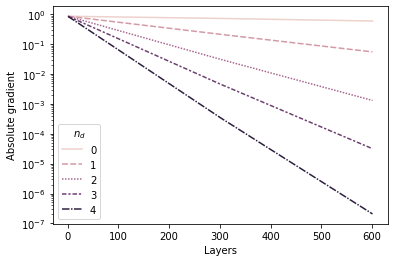

In [23]:
g = sns.lineplot(data=df, x="Layers", y="Absolute gradient", hue=r"$n_d$", style=r'$n_d$', ci=None,estimator=np.mean)
g.set_yscale("log")